## Load Dataset and Packages

In [ ]:
import pandas as pd
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
df.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [ ]:
index_list = [0, 4, 10, 22, 24, 37, 43, 50, 52, 53, 62, 77, 78, 85, 96, 97, 100, 111, 116, 134, 146, 148, 159, 165, 172, 176, 177, 188, 191, 197, 208, 210, 213, 232, 244, 246, 249, 251, 252, 255, 288, 291, 292, 298, 302, 305, 306, 310, 318, 324, 327, 329, 331, 341, 347, 350, 362, 375, 387, 388, 393, 397, 398, 411, 438, 439, 456, 467, 479, 484, 494, 495, 518, 519, 523, 538, 540, 548, 549, 550, 557, 558, 574, 590, 614, 615, 625, 635, 636, 637, 644, 647, 652, 659, 666, 673, 687, 689, 696, 699, 703, 709, 716, 739, 743, 750, 755, 757, 763, 783, 785, 789, 801, 816, 817, 826, 829, 836, 840, 844, 858, 868, 871, 884, 891, 892, 894, 902, 906, 913, 916, 923, 935, 937, 938, 945, 950, 953, 958, 970, 977, 979, 980, 982, 986, 991, 993, 995, 1003, 1008, 1017, 1026, 1044, 1065, 1069, 1073, 1078, 1083, 1086, 1096, 1108, 1115, 1124, 1129, 1130, 1138, 1143, 1152, 1182, 1186, 1209, 1228, 1230, 1248, 1250, 1261, 1271, 1276, 1279, 1283, 1294, 1311, 1312, 1323, 1326, 1328, 1330, 1343, 1352, 1353, 1361, 1362, 1366, 1368, 1371, 1374, 1380, 1384, 1386, 1390, 1395, 1403, 1417, 1419, 1422, 1428, 1429, 1435, 1437, 1441, 1444, 1456, 1460, 1464, 1471, 1472, 1474, 1477, 1480, 1488, 1491, 1494, 1495, 1516, 1523, 1537, 1541, 1542, 1558, 1559, 1560, 1564, 1568, 1569, 1570]
df = df.drop(index_list)

# Reset the index after dropping rows
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1338 non-null   object 
 1   title_orig                    1338 non-null   object 
 2   price                         1338 non-null   float64
 3   retail_price                  1338 non-null   int64  
 4   currency_buyer                1338 non-null   object 
 5   units_sold                    1338 non-null   int64  
 6   uses_ad_boosts                1338 non-null   int64  
 7   rating                        1338 non-null   float64
 8   rating_count                  1338 non-null   int64  
 9   rating_five_count             1297 non-null   float64
 10  rating_four_count             1297 non-null   float64
 11  rating_three_count            1297 non-null   float64
 12  rating_two_count              1297 non-null   float64
 13  rat

#Data Exploration

In [ ]:
sales = [1 if sales > 300 else 0 for sales in df["units_sold"]]
df['high_sale'] = sales

C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\945564449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])


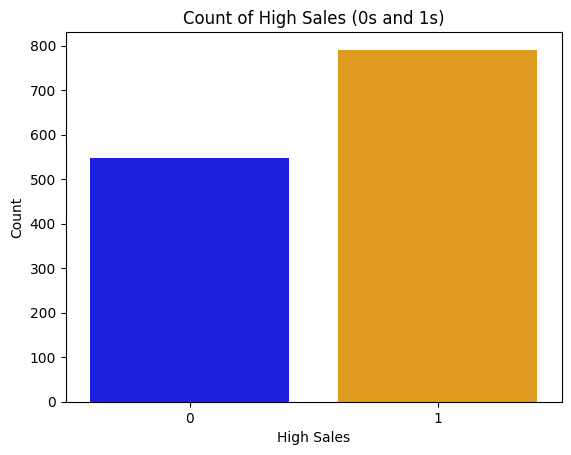

In [ ]:
# Plotting with Seaborn
sns.countplot(data=df, x='high_sale', palette=['blue', 'orange'])
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.title('Count of High Sales (0s and 1s)')
plt.show()

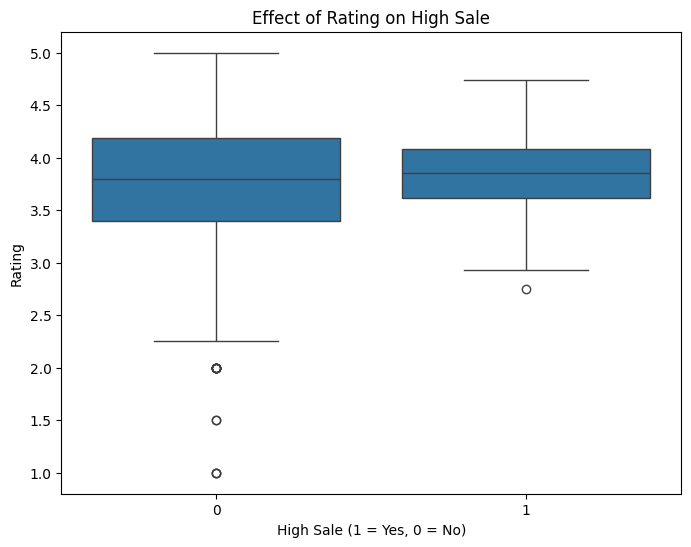

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='high_sale', y='rating', data=df)

# Adding labels and title
plt.xlabel('High Sale (1 = Yes, 0 = No)')
plt.ylabel('Rating')
plt.title('Effect of Rating on High Sale')

# Show the plot
plt.show()

##Word Frequency Plot

In [ ]:
def word_frequency(sentence):
  # joins all the sentenses
  sentence =" ".join(sentence)
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and triplets
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  triplets =pd.DataFrame(counted_3.items(),columns=['triplets','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,triplets

In [ ]:
data2, data3, data4 = word_frequency(df['title_orig'].tolist())

In [ ]:
print(data3.columns)
data3['pairs'] = data3['pairs'].astype(str)
print(data3.dtypes)

Index(['pairs', 'frequency'], dtype='object')
pairs        object
frequency     int64
dtype: object


In [ ]:
data4

,triplets,frequency
68,"(plus, size, woman)",104
357,"(dress, plus, size)",100
153,"(summer, woman, fashion)",66
42,"(plus, size, summer)",60
83,"(woman, summer, casual)",52
...,...,...
4663,"(size, blouse, tee)",1
4662,"(fit, plus, size)",1
4661,"(slim, fit, plus)",1
4660,"(lady, slim, fit)",1


In [ ]:
print(data4.columns)
data4['triplets'] = data4['triplets'].astype(str)
print(data4.dtypes)

Index(['triplets', 'frequency'], dtype='object')
triplets     object
frequency     int64
dtype: object


<Axes: xlabel='frequency', ylabel='triplets'>

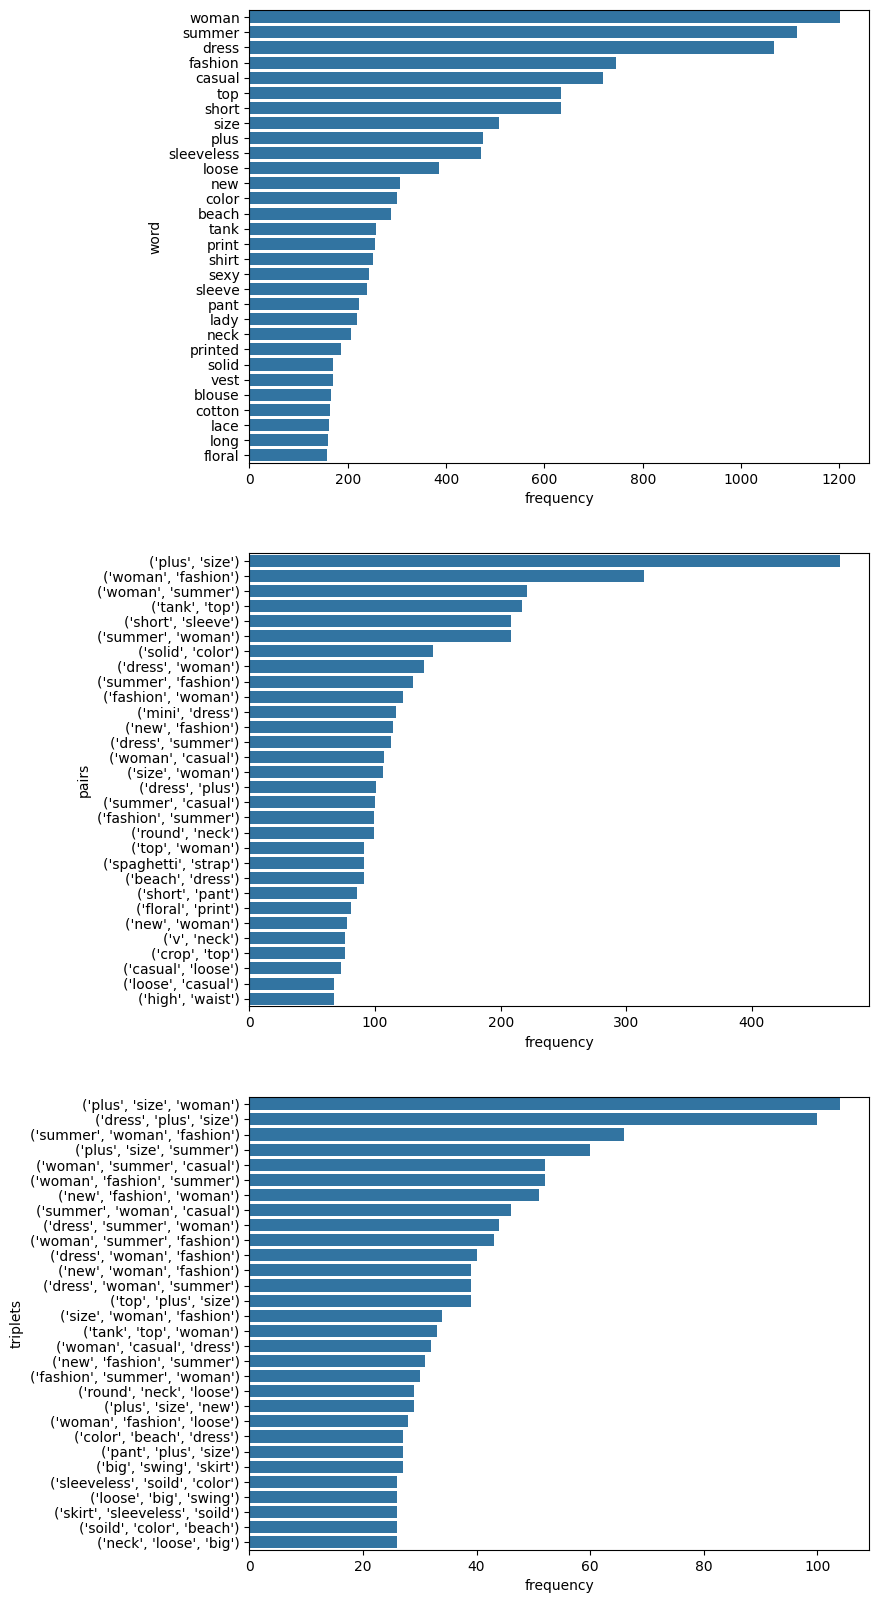

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='triplets',data=data4.head(30))

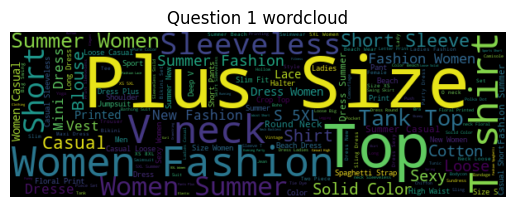

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(df['title_orig']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Question 1 wordcloud")
plt.axis("off")
plt.show()

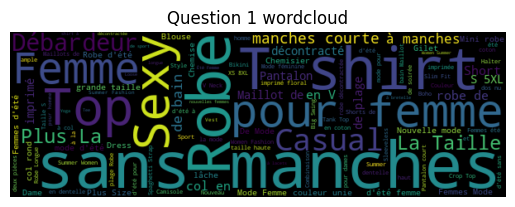

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Question 1 wordcloud")
plt.axis("off")
plt.show()

In [ ]:
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,high_sale
0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,0


In [ ]:
def calculate_description_similarity(df, description_column):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df[description_column])

    # Calculate pairwise similarity
    similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()

    # Create DataFrame with similarity scores
    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=df.index,
        columns=df.index
    )

    return similarity_df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
results = calculate_description_similarity(df, 'title_orig')
print(results)

          0         1         2         3         4         5         6     \
0     1.000000  0.024321  0.031525  0.130090  0.017973  0.243120  0.355363   
1     0.024321  1.000000  0.034018  0.010173  0.004769  0.007718  0.019346   
2     0.031525  0.034018  1.000000  0.013187  0.127236  0.035712  0.162512   
3     0.130090  0.010173  0.013187  1.000000  0.078355  0.012166  0.058880   
4     0.017973  0.004769  0.127236  0.078355  1.000000  0.035470  0.040725   
...        ...       ...       ...       ...       ...       ...       ...   
1333  0.030055  0.110284  0.019748  0.012572  0.016789  0.009538  0.139986   
1334  0.071080  0.058555  0.062723  0.007625  0.000000  0.385444  0.229134   
1335  0.102342  0.010928  0.041281  0.264769  0.016401  0.013069  0.226694   
1336  0.234325  0.038311  0.052390  0.044647  0.110114  0.216201  0.268841   
1337  0.022091  0.005862  0.021645  0.009240  0.025062  0.007010  0.190849   

          7         8         9     ...      1328      1329    

In [ ]:
def analyze_sentiment_distribution(df, description_column):
    """
    Analyze sentiment distribution in product descriptions
    """
    sia = SentimentIntensityAnalyzer()

    sentiments = []
    for desc in df[description_column]:
        sentiment_scores = sia.polarity_scores(desc)
        sentiments.append(sentiment_scores)

    sentiment_df = pd.DataFrame(sentiments)

    return sentiment_df

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
results = analyze_sentiment_distribution(df, 'title_orig')
print(results)

        neg    neu    pos  compound
0     0.000  0.490  0.510    0.6369
1     0.000  1.000  0.000    0.0000
2     0.000  0.643  0.357    0.8360
3     0.138  0.659  0.204    0.0258
4     0.124  0.699  0.177    0.2500
...     ...    ...    ...       ...
1333  0.000  1.000  0.000    0.0000
1334  0.000  1.000  0.000    0.0000
1335  0.000  0.873  0.127    0.1531
1336  0.000  1.000  0.000    0.0000
1337  0.000  0.603  0.397    0.5574

[1338 rows x 4 columns]


In [ ]:
df['log_price'] = [np.log(p) for p in df["price"]]
df['log_retail_price'] = [np.log(p) for p in df["retail_price"]]
df["discount_ratio"] = [df["price"][i]/float(df["retail_price"][i]) for i in range(len(df["price"]))]

In [ ]:
df['log_merchant_rating_count'] = np.log(df['merchant_rating_count'])
df['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df["urgency_text"]]

In [ ]:
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,product_picture,product_id,theme,crawl_month,high_sale,log_price,log_retail_price,discount_ratio,log_merchant_rating_count,urgent
0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1,2.079442,3.091042,0.363636,9.784253,1
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,0,2.079442,3.761200,0.186047,5.686975,1


In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 0 to 1337
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1312 non-null   object 
 1   title_orig                    1312 non-null   object 
 2   price                         1312 non-null   float64
 3   retail_price                  1312 non-null   int64  
 4   currency_buyer                1312 non-null   object 
 5   units_sold                    1312 non-null   int64  
 6   uses_ad_boosts                1312 non-null   int64  
 7   rating                        1312 non-null   float64
 8   rating_count                  1312 non-null   int64  
 9   rating_five_count             1273 non-null   float64
 10  rating_four_count             1273 non-null   float64
 11  rating_three_count            1273 non-null   float64
 12  rating_two_count              1273 non-null   float64
 13  rating_o

In [ ]:
df.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,product_picture,product_id,theme,crawl_month,high_sale,log_price,log_retail_price,discount_ratio,log_merchant_rating_count,urgent
0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1,2.079442,3.091042,0.363636,9.784253,1
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,0,2.079442,3.761200,0.186047,5.686975,1
2,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,1,2.079442,2.079442,1.000000,10.078784,0
3,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08,0,1.366092,2.197225,0.435556,4.174387,0
4,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,...,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08,1,1.945910,1.791759,1.166667,9.229555,0


##Metadata Features

In [ ]:
from collections import Counter
recounted = Counter(df["high_sale"])
recounted

Counter({1: 789, 0: 523})

In [ ]:
recounted = Counter(df["currency_buyer"])
recounted

Counter({'EUR': 1312})

In [ ]:
recounted = Counter(df["badges_count"])
recounted

Counter({0: 1189, 1: 112, 2: 9, 3: 2})

In [ ]:
recounted = Counter(df["badge_local_product"])
recounted

Counter({0: 1285, 1: 27})

In [ ]:
recounted = Counter(df["badge_product_quality"])
recounted

Counter({0: 1219, 1: 93})

In [ ]:
recounted = Counter(df["badge_fast_shipping"])
recounted

Counter({0: 1296, 1: 16})

In [ ]:
recounted = Counter(df["urgency_text"])
recounted

Counter({nan: 912,
         'Quantité limitée !': 399,
         'Réduction sur les achats en gros': 1})

In [ ]:
recounted = Counter(df["product_variation_size_id"])
recounted

Counter({'S': 538,
         'XS': 309,
         'M': 163,
         'XXS': 79,
         'L': 45,
         'XXL': 14,
         'XL': 13,
         'S.': 12,
         nan: 11,
         'XXXS': 5,
         '4XL': 5,
         'Size-XS': 4,
         'M.': 4,
         'SIZE XS': 4,
         '2XL': 4,
         'XS.': 3,
         'Size S': 3,
         '2pcs': 3,
         'SizeL': 3,
         'Size-S': 3,
         '10 ml': 3,
         's': 3,
         'Suit-S': 2,
         'EU 35': 2,
         'Size S.': 2,
         '29': 2,
         'One Size': 2,
         '1': 2,
         '5XL': 2,
         '33': 2,
         'XXXXL': 2,
         'size S': 2,
         '35': 2,
         '34': 2,
         'SIZE-XXS': 2,
         'S(bust 88cm)': 2,
         '1 pc.': 2,
         'S Pink': 2,
         'Size4XL': 2,
         'choose a size': 1,
         '32/L': 1,
         '4': 1,
         'US 6.5 (EU 37)': 1,
         '1pc': 1,
         '100 cm': 1,
         'S/M(child)': 1,
         'XXXL': 1,
         'S..': 1,
   

##Product Color

In [ ]:
# To improve consistency and reduce overfitting
def main_color(s):
  main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange",
  "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white",
  "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
  for key, value in main_color.items():
    if key in s:
      return value
  return "others"

In [ ]:
product_color = df["product_color"]
product_color = [s.lower() if type(s) is str else 'nan' for s in product_color]
product_color = [main_color(s) for s in product_color]
product_color

['green',
 'orange',
 'black',
 'blue',
 'white',
 'blue',
 'black',
 'others',
 'blue',
 'orange',
 'red',
 'yellow',
 'black',
 'red',
 'white',
 'blue',
 'red',
 'green',
 'black',
 'green',
 'green',
 'others',
 'white',
 'pink',
 'white',
 'others',
 'black',
 'khaki',
 'black',
 'yellow',
 'white',
 'blue',
 'green',
 'pink',
 'black',
 'white',
 'black',
 'white',
 'green',
 'green',
 'red',
 'white',
 'black',
 'blue',
 'pink',
 'red',
 'white',
 'orange',
 'white',
 'red',
 'blue',
 'khaki',
 'white',
 'white',
 'red',
 'blue',
 'white',
 'yellow',
 'white',
 'red',
 'green',
 'orange',
 'black',
 'black',
 'white',
 'green',
 'white',
 'pink',
 'green',
 'gray',
 'red',
 'green',
 'green',
 'pink',
 'white',
 'others',
 'pink',
 'black',
 'black',
 'gray',
 'green',
 'pink',
 'red',
 'orange',
 'black',
 'green',
 'black',
 'white',
 'yellow',
 'gray',
 'black',
 'white',
 'red',
 'green',
 'black',
 'black',
 'others',
 'pink',
 'black',
 'green',
 'purple',
 'green',
 'blac

In [ ]:
recounted = Counter(product_color)
recounted

Counter({'black': 263,
         'white': 224,
         'blue': 134,
         'red': 125,
         'green': 121,
         'pink': 110,
         'yellow': 95,
         'others': 76,
         'gray': 67,
         'purple': 44,
         'orange': 24,
         'khaki': 13,
         'brown': 13,
         'navy': 3})

In [ ]:
from matplotlib import colors
# product_color = [(-0.1,-0.1,-0.1,-0.1) if s == "others" else colors.to_rgba(s) for s in product_color]
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]
product_colors

[array([0.        , 0.50196078, 0.        ]),
 array([1.        , 0.64705882, 0.        ]),
 array([0., 0., 0.]),
 array([0., 0., 1.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([0., 0., 0.]),
 array([0.52942128, 0.4252332 , 0.41429659]),
 array([0., 0., 1.]),
 array([1.        , 0.64705882, 0.        ]),
 array([1., 0., 0.]),
 array([1., 1., 0.]),
 array([0., 0., 0.]),
 array([1., 0., 0.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([1., 0., 0.]),
 array([0.        , 0.50196078, 0.        ]),
 array([0., 0., 0.]),
 array([0.        , 0.50196078, 0.        ]),
 array([0.        , 0.50196078, 0.        ]),
 array([0.52942128, 0.4252332 , 0.41429659]),
 array([1., 1., 1.]),
 array([1.        , 0.75294118, 0.79607843]),
 array([1., 1., 1.]),
 array([0.52942128, 0.4252332 , 0.41429659]),
 array([0., 0., 0.]),
 array([0.94117647, 0.90196078, 0.54901961]),
 array([0., 0., 0.]),
 array([1., 1., 0.]),
 array([1., 1., 1.]),
 array([0., 0., 1.]),
 array([0.        , 0.50196078, 

##Inspect Y: unit_sold

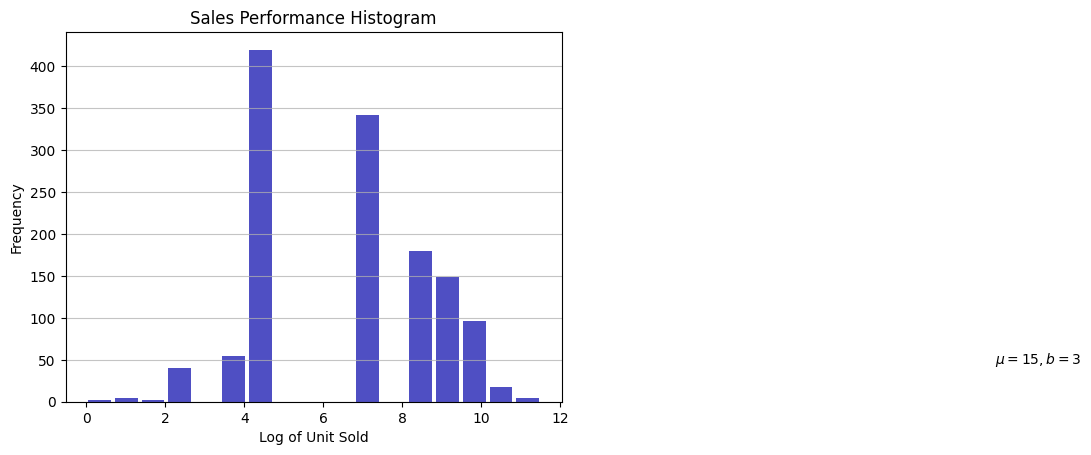

In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=np.log(df["units_sold"]), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Log of Unit Sold')
plt.ylabel('Frequency')
plt.title('Sales Performance Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

#Feature Engineering


In [ ]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,product_picture,product_id,theme,crawl_month,high_sale,log_price,log_retail_price,discount_ratio,log_merchant_rating_count,urgent
0,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08,1,2.079442,3.091042,0.363636,9.784253,1
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08,0,2.079442,3.761200,0.186047,5.686975,1
2,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08,1,2.079442,2.079442,1.000000,10.078784,0
3,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08,0,1.366092,2.197225,0.435556,4.174387,0
4,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,...,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08,1,1.945910,1.791759,1.166667,9.229555,0


## Metadata

Product Color

In [ ]:
df['product_color_rgb'] = product_colors

Log Prices

##Title Word2Vec

In [ ]:
def process_sentence(sentence):
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [ ]:
titles = df['title_orig'].tolist()
data = [process_sentence(t) for t in titles]
data[0]

['woman', 'casual', 'summer', 'sleeveless', 'sexy', 'mini', 'dress']

In [ ]:
model = gensim.models.Word2Vec(sentences=data, window=5, min_count=1, workers=4)
model.train(data,total_examples=len(data),epochs=10)

(96949, 192550)

In [ ]:
print(model.wv['woman'])  # Find the vector of the word.
print(model.wv.most_similar('woman', topn=10))  # 10 Most similar words for inspection.

[ 0.07745265  0.24825154  0.06481043  0.08067629  0.36790976 -0.46069148
  0.34032863  0.6525511  -0.3587359  -0.28733903 -0.04735293 -0.65841407
 -0.07619433  0.19207005  0.15610473 -0.09854273  0.311878   -0.14195715
 -0.10370167 -0.8102618   0.05258743  0.27823097  0.5206954  -0.22988342
  0.03576932  0.1201136  -0.22802922  0.1078226  -0.3161116   0.1201726
  0.5243272  -0.22995372  0.1755678  -0.48066866 -0.34300953  0.2595184
  0.34344023 -0.11190229 -0.16471931 -0.26983497  0.17852797 -0.4389611
 -0.04665984  0.04483519  0.2774829  -0.24291162 -0.30418855 -0.18496156
  0.18536668  0.35776055  0.38720676 -0.274995   -0.01528832 -0.02908525
 -0.37212896 -0.05962927  0.28781286 -0.07107151 -0.21144325  0.07108383
  0.05012828  0.00564401  0.35745764  0.1451724  -0.3023517   0.5728179
 -0.07824341  0.3544832  -0.50707585  0.3833636  -0.034925    0.34206435
  0.403425    0.01872507  0.51919633 -0.08768842  0.10798618  0.25495645
 -0.03224677 -0.07562929 -0.4160446  -0.16287914 -0.529

In [ ]:
def caculate_average_word2vec(model, word_list):
  sum = np.matrix([model.wv[w] for w in word_list]).sum(axis=0)
  return sum / len(word_list)

In [ ]:
word2vec_avg = [caculate_average_word2vec(model, d) for d in data]
df['word2vec_avg'] = word2vec_avg

## Label y (Low / High Sales)

## Keep Features For Training

In [ ]:
data = df[["log_price", "log_retail_price", "uses_ad_boosts", "rating", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "product_color_rgb", "urgent", "log_merchant_rating_count", "word2vec_avg", "high_sale"]]

In [ ]:
data = df[["log_price", "log_retail_price", "discount_ratio", "uses_ad_boosts", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "product_color_rgb", "urgent", "word2vec_avg", "high_sale"]]

In [ ]:
data.head()

,log_price,log_retail_price,discount_ratio,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,product_color_rgb,urgent,word2vec_avg,high_sale
0,2.079442,3.091042,0.363636,1,0,0,0,0,2,0,41,50,"[0.0, 0.5019607843137255, 0.0]",1,[[[[[ 0.08384748 0.16855265 -0.01567368 0.08...,1
1,2.079442,3.761200,0.186047,0,0,0,0,0,3,0,36,50,"[1.0, 0.6470588235294118, 0.0]",1,[[[[[-0.04169655 0.20500974 -0.10986319 -0.06...,0
2,2.079442,2.079442,1.000000,1,0,0,0,0,2,0,41,50,"[0.0, 0.0, 0.0]",0,[[[[[ 5.5836271e-02 3.6633301e-01 8.1909530e...,1
3,1.366092,2.197225,0.435556,0,0,0,0,0,1,0,40,50,"[0.0, 0.0, 1.0]",0,[[[[[ 8.7612547e-02 2.6344535e-01 1.2144910e...,0
4,1.945910,1.791759,1.166667,0,0,0,0,0,2,0,31,50,"[1.0, 1.0, 1.0]",0,[[[[[ 0.12918575 0.29733324 0.16243212 0.15...,1


In [ ]:
data['word2vec_avg'][0].shape

(1, 100)

#NN Model

## Baseline 1: Random Forest

In [ ]:
data_rf = data
rgb = data_rf["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]

C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2114236971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2114236971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2114236971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
data_rf

,log_price,log_retail_price,discount_ratio,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,product_color_rgb,urgent,word2vec_avg,high_sale,product_color_rgb0,product_color_rgb1,product_color_rgb2
0,2.079442,3.091042,0.363636,1,0,0,0,0,2,0,41,50,"[0.0, 0.5019607843137255, 0.0]",1,[[[[[ 0.08384748 0.16855265 -0.01567368 0.08...,1,0.0,0.501961,0.0
1,2.079442,3.761200,0.186047,0,0,0,0,0,3,0,36,50,"[1.0, 0.6470588235294118, 0.0]",1,[[[[[-0.04169655 0.20500974 -0.10986319 -0.06...,0,1.0,0.647059,0.0
2,2.079442,2.079442,1.000000,1,0,0,0,0,2,0,41,50,"[0.0, 0.0, 0.0]",0,[[[[[ 5.5836271e-02 3.6633301e-01 8.1909530e...,1,0.0,0.000000,0.0
3,1.366092,2.197225,0.435556,0,0,0,0,0,1,0,40,50,"[0.0, 0.0, 1.0]",0,[[[[[ 8.7612547e-02 2.6344535e-01 1.2144910e...,0,0.0,0.000000,1.0
4,1.945910,1.791759,1.166667,0,0,0,0,0,2,0,31,50,"[1.0, 1.0, 1.0]",0,[[[[[ 0.12918575 0.29733324 0.16243212 0.15...,1,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1.098612,2.079442,0.375000,1,0,0,0,0,1,0,41,50,"[0.0, 0.0, 1.0]",1,[[[[[-0.05762525 0.4232378 -0.08216301 -0.26...,0,0.0,0.000000,1.0
1334,2.397895,4.897840,0.082090,1,0,0,0,0,3,0,46,50,"[0.0, 0.0, 0.0]",0,[[[[[ 0.0122424 0.22954361 -0.0719692 -0.03...,0,0.0,0.000000,0.0
1335,2.079442,1.945910,1.142857,1,1,0,1,0,2,0,44,50,"[0.0, 0.0, 0.0]",0,[[[[[ 0.06013493 0.26072487 0.0316537 -0.09...,1,0.0,0.000000,0.0
1336,2.564949,2.397895,1.181818,0,0,0,0,0,3,0,29,50,"[1.0, 1.0, 1.0]",0,[[[[[ 7.99494237e-02 1.48908034e-01 -4.655015...,0,1.0,1.000000,1.0


In [ ]:
word2vec = data_rf["word2vec_avg"]
word2vec = np.stack(word2vec.values, axis=0)
for i in range(100):
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]

C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2708778237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2708778237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18828\2708778237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
data_rf['word2vec_avg0']

0       0.083847
1      -0.041697
2       0.055836
3       0.087613
4       0.129186
          ...   
1333   -0.057625
1334    0.012242
1335    0.060135
1336    0.079949
1337   -0.042040
Name: word2vec_avg0, Length: 1312, dtype: float32

In [ ]:
#data_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
data_rf = data_rf.dropna()

In [ ]:
list(data_rf.columns)

['log_price',
 'log_retail_price',
 'discount_ratio',
 'uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'product_color_rgb',
 'urgent',
 'word2vec_avg',
 'high_sale',
 'product_color_rgb0',
 'product_color_rgb1',
 'product_color_rgb2',
 'word2vec_avg0',
 'word2vec_avg1',
 'word2vec_avg2',
 'word2vec_avg3',
 'word2vec_avg4',
 'word2vec_avg5',
 'word2vec_avg6',
 'word2vec_avg7',
 'word2vec_avg8',
 'word2vec_avg9',
 'word2vec_avg10',
 'word2vec_avg11',
 'word2vec_avg12',
 'word2vec_avg13',
 'word2vec_avg14',
 'word2vec_avg15',
 'word2vec_avg16',
 'word2vec_avg17',
 'word2vec_avg18',
 'word2vec_avg19',
 'word2vec_avg20',
 'word2vec_avg21',
 'word2vec_avg22',
 'word2vec_avg23',
 'word2vec_avg24',
 'word2vec_avg25',
 'word2vec_avg26',
 'word2vec_avg27',
 'word2vec_avg28',
 'word2vec_avg29',
 'word2vec_avg30',
 'word2vec_avg31',
 'word2vec

In [ ]:
X = data_rf[data_rf.columns.difference(['high_sale', 'product_color_rgb', 'word2vec_avg'])]
y = data_rf['high_sale']

In [ ]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

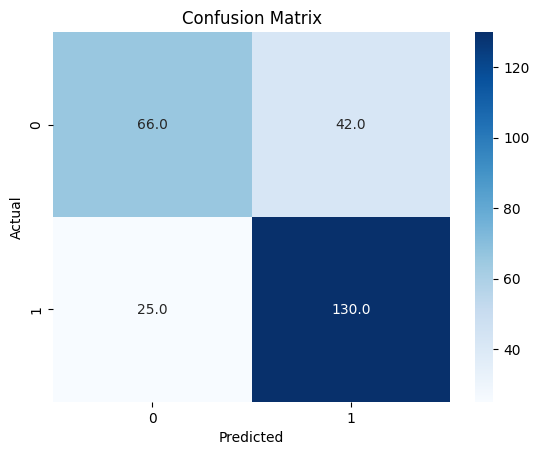

Accuracy: 74.52%
Precision: 0.76
Recall: 0.84
F1 Score: 0.80


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Predict on the test data
y_pred = clf.predict(X_test)

# Generate confusion matrix
cf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


## Baseline 2: Shallow NN Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# define the keras model
model = Sequential()
model.add(layers.Dense(12, input_dim=116, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5160 - loss: 0.7819
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6677
Epoch 3/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5977 - loss: 0.6822
Epoch 4/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.6698
Epoch 5/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 0.6711
Epoch 6/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 0.6810
Epoch 7/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 0.6511
Epoch 8/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6002 - loss: 0.6717
Epoch 9/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.6564
Epoch 10/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5828 - loss: 0.6784
Epoch 11/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 0.6571
Epoch 12/150
105/105 ━━━━━━━━━━━━━━━━━━━━